In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

Extent       Date
0    320266.650 1979-01-01
1    541778.338 1979-02-01
2    638262.988 1979-03-01
3    423025.159 1979-04-01
4    215587.216 1979-05-01
..          ...        ...
488  317377.493 2023-05-01
489   39601.476 2023-06-01
490   16935.702 2023-07-01
491    1305.744 2023-09-01
492   12255.644 2023-10-01

[493 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 5
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((477, 12, 1), (477,))

In [8]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bering_model_LT5/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
41/48 [========================>.....] - ETA: 0s - loss: 0.1453 - root_mean_squared_error: 0.3812

INFO:tensorflow:Assets written to: Bering_model_LT5\assets


INFO:tensorflow:Assets written to: Bering_model_LT5\assets


48/48 [==============================] - 6s 80ms/step - loss: 0.1371 - root_mean_squared_error: 0.3703 - val_loss: 0.0445 - val_root_mean_squared_error: 0.2110
Epoch 2/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0931 - root_mean_squared_error: 0.3051

INFO:tensorflow:Assets written to: Bering_model_LT5\assets


INFO:tensorflow:Assets written to: Bering_model_LT5\assets


48/48 [==============================] - 3s 58ms/step - loss: 0.0912 - root_mean_squared_error: 0.3019 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1936
Epoch 3/50
37/48 [======================>.......] - ETA: 0s - loss: 0.0731 - root_mean_squared_error: 0.2704

INFO:tensorflow:Assets written to: Bering_model_LT5\assets


INFO:tensorflow:Assets written to: Bering_model_LT5\assets


48/48 [==============================] - 3s 68ms/step - loss: 0.0723 - root_mean_squared_error: 0.2689 - val_loss: 0.0333 - val_root_mean_squared_error: 0.1824
Epoch 4/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0622 - root_mean_squared_error: 0.2495

INFO:tensorflow:Assets written to: Bering_model_LT5\assets


INFO:tensorflow:Assets written to: Bering_model_LT5\assets


48/48 [==============================] - 3s 72ms/step - loss: 0.0572 - root_mean_squared_error: 0.2391 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1745
Epoch 5/50
48/48 [==============================] - ETA: 0s - loss: 0.0433 - root_mean_squared_error: 0.2081

INFO:tensorflow:Assets written to: Bering_model_LT5\assets


INFO:tensorflow:Assets written to: Bering_model_LT5\assets


48/48 [==============================] - 3s 56ms/step - loss: 0.0433 - root_mean_squared_error: 0.2081 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1703
Epoch 6/50
32/48 [===================>..........] - ETA: 0s - loss: 0.0306 - root_mean_squared_error: 0.1750

INFO:tensorflow:Assets written to: Bering_model_LT5\assets


INFO:tensorflow:Assets written to: Bering_model_LT5\assets


48/48 [==============================] - 3s 60ms/step - loss: 0.0370 - root_mean_squared_error: 0.1924 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1686
Epoch 7/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0305 - root_mean_squared_error: 0.1746 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1693
Epoch 8/50
48/48 [==============================] - 0s 8ms/step - loss: 0.0263 - root_mean_squared_error: 0.1621 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1729
Epoch 9/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0269 - root_mean_squared_error: 0.1641 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1723
Epoch 10/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0196 - root_mean_squared_error: 0.1402 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1753
Epoch 11/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0217 - root_mean_squared_error: 0.1474 - val_loss: 0.0324 - val_root_mean_squared_er

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

0.5235325535138448 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

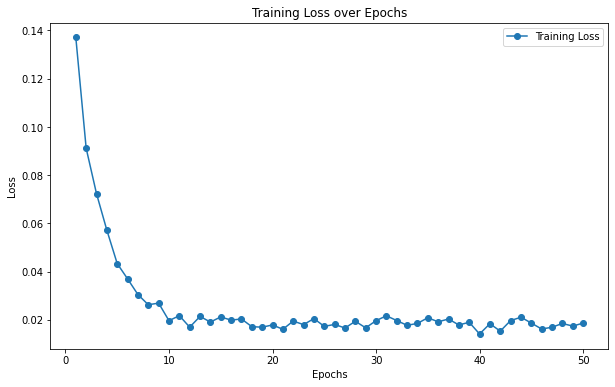

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

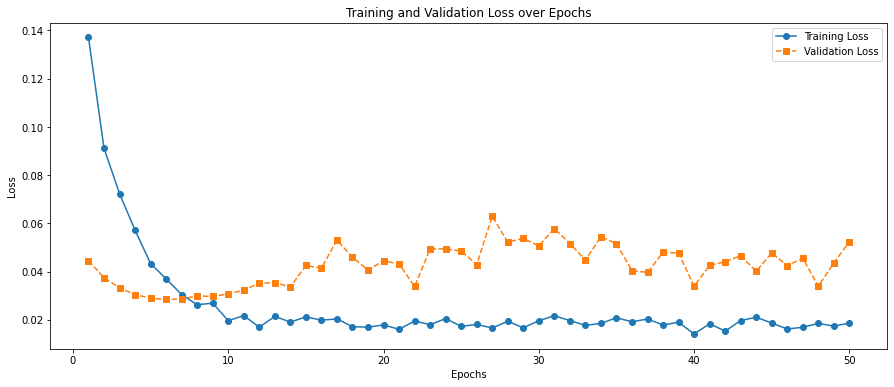

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT5/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.22820814485195817
MAE : 0.19287945689674615


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0       169729.687500      11293.282
1       192549.234375      49957.406
2       203786.750000     151973.751
3       222936.484375     466524.938
4       224356.906250     708542.184
5       233302.296875     652598.000
6       221268.562500     414216.785
7       203608.000000     236263.303
8       170062.531250      43422.368
9       149035.968750       2161.744
10      146471.687500        944.181
11      163193.031250      13977.643
12      181321.859375      24795.001
13      195908.828125     168828.990
14      230631.531250     461098.498
15      237397.687500     591635.798
16      246706.578125     598360.298
17      243465.140625     531742.038
18      217901.984375     302131.004
19      183458.875000      57748.135
20      166013.906250       3054.962
21      158644.093750        442.539
22      164516.171875       8541.643
23      174222.890625     121335.125
24      198990.968750     360205.990
25      228917.250000     651717.220
26      242076.171875     779385.402
27      247245.562500     710314.085
28      225106.703125     578635.421
29      196763.656250     199031.792
30      169077.875000      43795.314
31      161034.718750       3015.211
32      160416.843750       1206.623
33      171130.390625       8506.979
34      187146.781250      41065.748
35      225412.906250     169363.165
36      240479.296875     531698.544
37      259647.234375     631496.345
38      260608.218750     612860.407
39      258739.937500     552903.799
40      225844.625000     317377.493
41      189001.015625      39601.476
42      165848.468750      16935.702
43      163820.734375       1305.744
44      165208.406250      12255.644

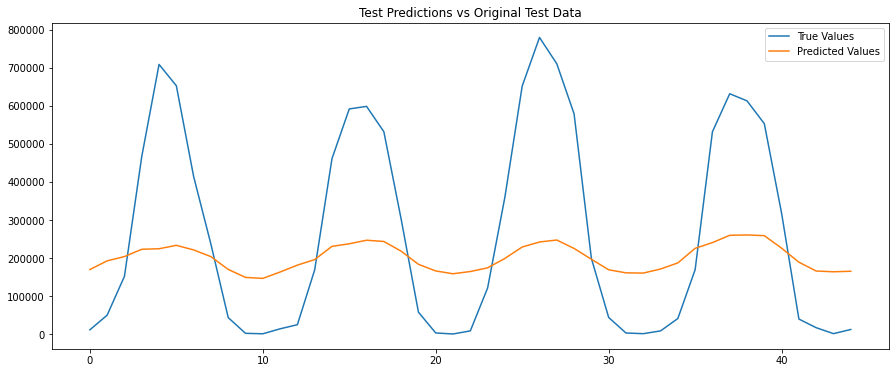

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 2ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

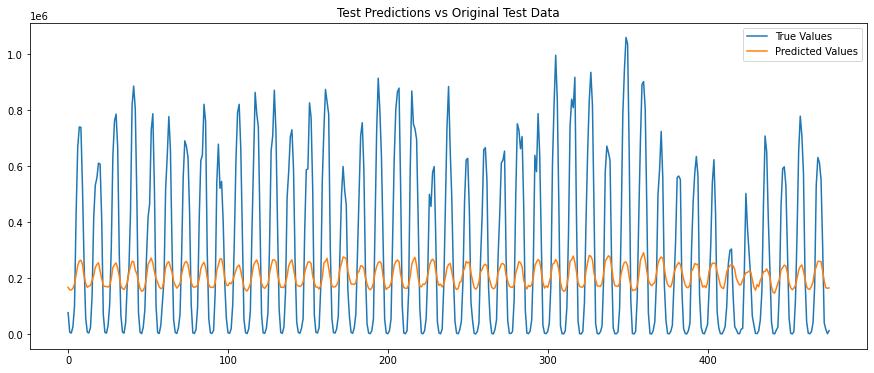

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()